#### Statistical Analysis

In [594]:
# statistical analysis

#### Step 1. Data Preprocessing & Cleaning
✔ Load the dataset\
✔ Identify and handle missing values (true missing vs. "NA" meaning absence)\
✔ Convert incorrect data types (e.g., numeric features stored as objects)\
✔ Handle outliers and anomalies

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [596]:
train = pd.read_csv("home-data-for-ml-course\\train.csv")
test = pd.read_csv("home-data-for-ml-course\\test.csv")
sample_submission=pd.read_csv("home-data-for-ml-course\\sample_submission.csv")


train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

sample_submission = sample_submission.drop("Id", axis=1)


data = pd.concat([train, test], axis=0, ignore_index=True)
data.columns= data.columns.str.strip()




In [597]:
#save the id
data_ID = data["Id"]
test_ID = test["Id"]
data_ID=data["Id"]

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
data.drop("Id", axis = 1, inplace = True)


In [598]:
data[["LotFrontage", "MasVnrArea", "GarageYrBlt"]] = data[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].apply(pd.to_numeric, errors="coerce")

#group features for preprocessing purpose.
data_categorical = [feature for feature in data.columns if data[feature].dtype == "object"] 

data_nominal = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

data_ordinal = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']

data_numerical = [feature for feature in data.columns if feature not in data_categorical + ['SalePrice']]

discrete_numerical_data = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
  'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical_data = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                  'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                  'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                  'MiscVal','YrSold','SalePrice']
data_numerical_df=data[data_numerical]
data_categorical_df=data[data_categorical]
continuous_numerical_data_df=data[continuous_numerical_data]
discrete_numerical_data_df=data[discrete_numerical_data ]
data_nominal_df=data[data_nominal]
data_ordinal_df=data[data_ordinal]


In [599]:
# Count the number of features (columns) for each type
print(f"Number of numerical features: {data_numerical_df.shape[1]}")
print(f"Number of categorical features: {data_categorical_df.shape[1]}")
print(f"Number of continuous numerical features: {continuous_numerical_data_df.shape[1]}")
print(f"Number of discrete numerical features: {discrete_numerical_data_df.shape[1]}")
print(f"Number of nominal features: {data_nominal_df.shape[1]}")
print(f"Number of ordinal features: {data_ordinal_df.shape[1]}")


Number of numerical features: 36
Number of categorical features: 43
Number of continuous numerical features: 24
Number of discrete numerical features: 13
Number of nominal features: 23
Number of ordinal features: 20


### Data Cleaning

##### Handeling Missing Values

NA is not a valid value for numerical features, but for some categorical features, it is a legitimate category (distinct from an absent value). We've identified where 'NA' is a valid value and where it is not, to handle absent values appropriately.

Categorical features :
We don't have any missing values  


Numerical Features

In [600]:
from sklearn.impute import SimpleImputer
import pandas as pd


# Print the number of null values before imputation
print("Number of null values before:", data_numerical_df.isnull().sum().sum())

# Create the imputer and specify the strategy (mean imputation)
imputer = SimpleImputer(strategy='mean')

# Perform the imputation, keeping the result as a DataFrame with the original columns
data_numerical_df = pd.DataFrame(imputer.fit_transform(data_numerical_df), columns=data_numerical_df.columns)

print("Number of null values after:", data_numerical_df.isnull().sum().sum())



Number of null values before: 678
Number of null values after: 0


##### Encoding Features 

 Encoding Ordinal Features

In [601]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to the specified columns
data_ordinal_df_encoded = ordinal_encoder.fit_transform(data_ordinal_df)

# Convert the encoded values to a DataFrame and keep the original column names
data_ordinal_df_encoded = pd.DataFrame(data_ordinal_df_encoded, columns=data_ordinal_df.columns)




In [602]:
# Create an empty list to hold the results
encoded_values_list = []

# Loop through each feature in the ordinal columns
for col in data_ordinal_df.columns:
    # Fit and transform the feature
    ordinal_encoder.fit(data_ordinal_df[[col]])
    
    # Retrieve the original categories and corresponding encoded values
    original_categories = ordinal_encoder.categories_[0]
    encoded_values = list(range(len(original_categories)))
    
    # Append to the list as a dictionary
    encoded_values_list.append({
        "Feature": col,
        "Possible Values": ", ".join(map(str, original_categories)),  # Convert all values to string
        "Encoded Values": ", ".join(map(str, encoded_values))
    })

# Convert the list to a DataFrame
encoded_values_df = pd.DataFrame(encoded_values_list)

# Display the DataFrame
encoded_values_df


,Feature,Possible Values,Encoded Values
0,LotShape,"IR1, IR1 , IR2, IR2 , IR3, IR3 ...","0, 1, 2, 3, 4, 5, 6, 7"
1,Utilities,"AllPub, AllPub , NoSeWa , nan","0, 1, 2, 3"
2,LandSlope,"Gtl, Gtl , Mod, Mod , Sev, Sev","0, 1, 2, 3, 4, 5"
3,ExterQual,"Ex, Ex , Fa, Fa , Gd, Gd ...","0, 1, 2, 3, 4, 5, 6, 7"
4,ExterCond,"Ex, Ex , Fa, Fa , Gd, Gd ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
5,BsmtQual,"Ex, Ex , Fa, Fa , Gd, Gd , N...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
6,BsmtCond,"Fa, Fa , Gd, Gd , NA , Po, P...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
7,BsmtExposure,"Av, Av , Gd, Gd , Mn, Mn ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
8,BsmtFinType1,"ALQ, ALQ , BLQ, BLQ , GLQ, G...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13"
9,BsmtFinType2,"ALQ, ALQ , BLQ, BLQ , GLQ, G...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13"


Encoding Nominal Features

In [603]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to the specified nominal columns
data_nominal_df_encoded = data_nominal_df.apply(label_encoder.fit_transform)



In [604]:
# Create an empty list to hold the results
encoded_values_list_nominal = []

# Loop through each feature in the nominal columns
for col in data_nominal_df.columns:
    # Fit and transform the feature
    label_encoder.fit(data_nominal_df[col])
    
    # Retrieve the original categories and corresponding encoded values
    original_categories = label_encoder.classes_
    encoded_values = list(range(len(original_categories)))
    
    # Append to the list as a dictionary
    encoded_values_list_nominal.append({
        "Feature": col,
        "Possible Values": ", ".join([str(value) for value in original_categories]),
        "Encoded Values": ", ".join(map(str, encoded_values))
    })

# Convert the list to a DataFrame
encoded_values_df_nominal = pd.DataFrame(encoded_values_list_nominal)

# Display the DataFrame
encoded_values_df_nominal


,Feature,Possible Values,Encoded Values
0,MSZoning,"C (all), C (all) , FV, FV , RH, RH ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10"
1,Street,"Grvl, Grvl , Pave, Pave","0, 1, 2, 3"
2,Alley,"Grvl, Grvl , NA , Pave, Pave , nan","0, 1, 2, 3, 4, 5"
3,LandContour,"Bnk, Bnk , HLS, HLS , Low, Low...","0, 1, 2, 3, 4, 5, 6, 7"
4,LotConfig,"Corner, Corner , CulDSac, CulDSac , FR2, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
5,Neighborhood,"Blmngtn, Blmngtn , Blueste, Blueste ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ..."
6,Condition1,"Artery, Artery , Feedr, Feedr , Norm,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ..."
7,Condition2,"Artery, Artery , Feedr, Feedr , Norm,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12"
8,BldgType,"1Fam, 1Fam , 2fmCon, 2fmCon , Duplex, Du...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9"
9,HouseStyle,"1.5Fin, 1.5Fin , 1.5Unf, 1.5Unf , 1Sto...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14"


In [605]:
data_cleaned = pd.concat([data_nominal_df_encoded, data_ordinal_df_encoded, data_numerical_df], axis=1)


In [606]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data (excluding the target variable y)
data_cleaned_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Check the scaled data
data_cleaned_scaled.to_csv("output_scaled.csv")
data_cleaned_scaled.head()



,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.310238,0.984367,-0.865729,0.632719,0.738037,-1.207040,0.231098,0.802488,-0.208019,1.118697,...,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.310238,0.984367,-0.865729,0.632719,-0.498130,1.983868,-0.872050,0.802488,-0.208019,-0.342366,...,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
2,0.310238,0.984367,-0.865729,0.632719,0.738037,-1.207040,0.231098,0.802488,-0.208019,1.118697,...,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
3,0.310238,0.984367,-0.865729,0.632719,-1.734298,-1.039098,0.231098,0.802488,-0.208019,1.118697,...,0.785457,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
4,0.310238,0.984367,-0.865729,0.632719,-0.498130,0.472385,0.231098,0.802488,-0.208019,1.118697,...,1.686437,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646


#### Step 2.Exploratory Data Analysis (EDA)
✔ Visualize target variable (SalePrice)\
Identify correlations between features and SalePrice\
Analyze categorical vs. numerical features\
Detect and handle outliers\

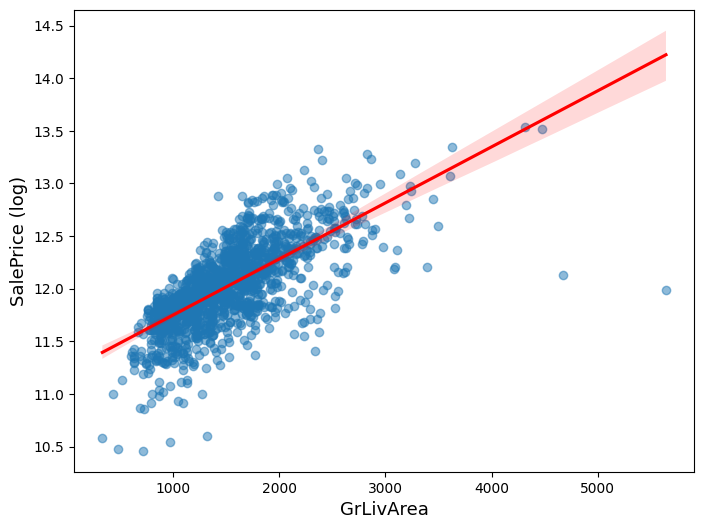

In [607]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot with regression line
sns.regplot(x=data['GrLivArea'], 
            y=np.log(data['SalePrice']), 
            ax=ax, 
            scatter_kws={'alpha': 0.5},  # Adjust transparency of points
            line_kws={'color': 'red'})  # Set line color

# Labels
ax.set_xlabel("GrLivArea", fontsize=13)
ax.set_ylabel("SalePrice (log)", fontsize=13)

# Show the plot
plt.show()

#box plot, check it its used for geting outliers.

##### Handeling outliers
dropped visually appearing outliers

In [608]:

data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<250000)].index)

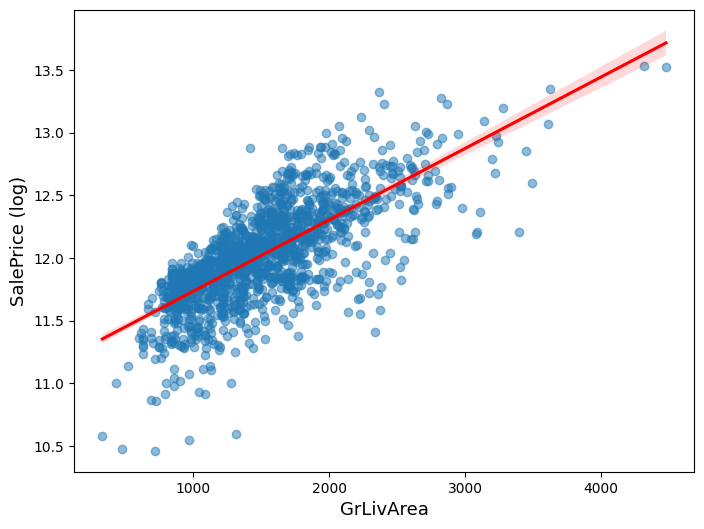

In [609]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot with regression line
sns.regplot(x=data['GrLivArea'], 
            y=np.log(data['SalePrice']), 
            ax=ax, 
            scatter_kws={'alpha': 0.5},  # Adjust transparency of points
            line_kws={'color': 'red'})  # Set line color

# Labels
ax.set_xlabel("GrLivArea", fontsize=13)
ax.set_ylabel("SalePrice (log)", fontsize=13)

# Show the plot
plt.show()

#box plot, check it its used for geting outliers.

##### Plotting the relationship between the different numerical values and the SalePrice


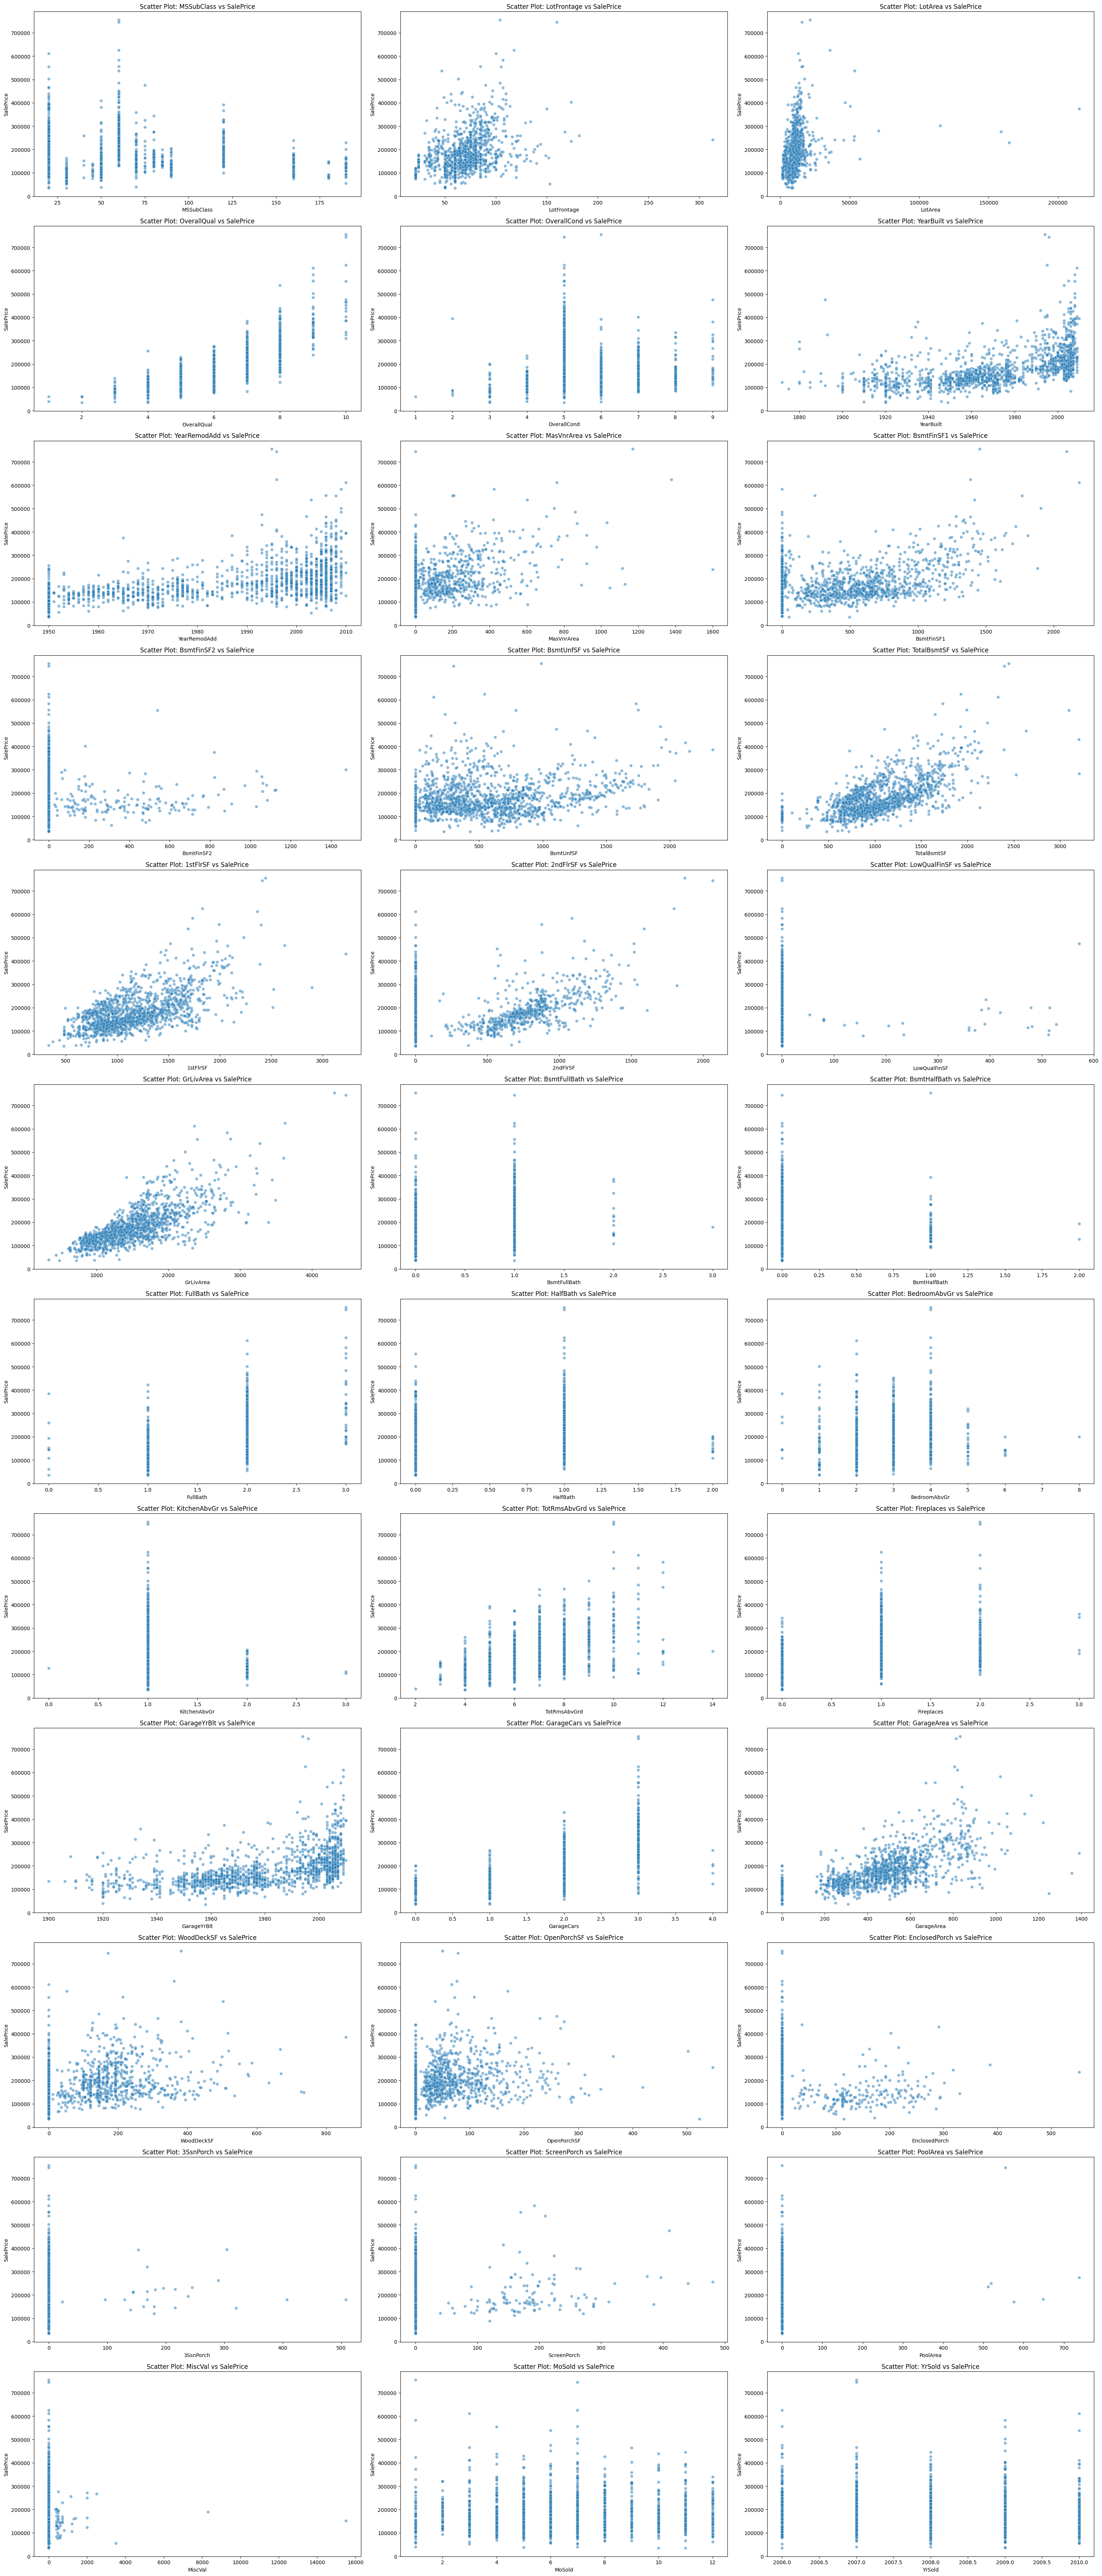

In [610]:
# Create subplots with larger figure size
fig, ax = plt.subplots(12, 3, figsize=(30, 70))

# Loop through each numerical feature
for var, subplot in zip(data_numerical, ax.flatten()):
    sns.scatterplot(x=data[var], y=data['SalePrice'], ax=subplot, alpha=0.5)
    subplot.set_title(f"Scatter Plot: {var} vs SalePrice", fontsize=12)

# Tighten layout
plt.tight_layout()

plt.show()


***Visualized the correlation between our target value [SalePrice] and all of our numerical features.***
- helps us understand our data better.
- show which features contributes more to the target value.
- show which features have the smallest effect incase we want to drop them.

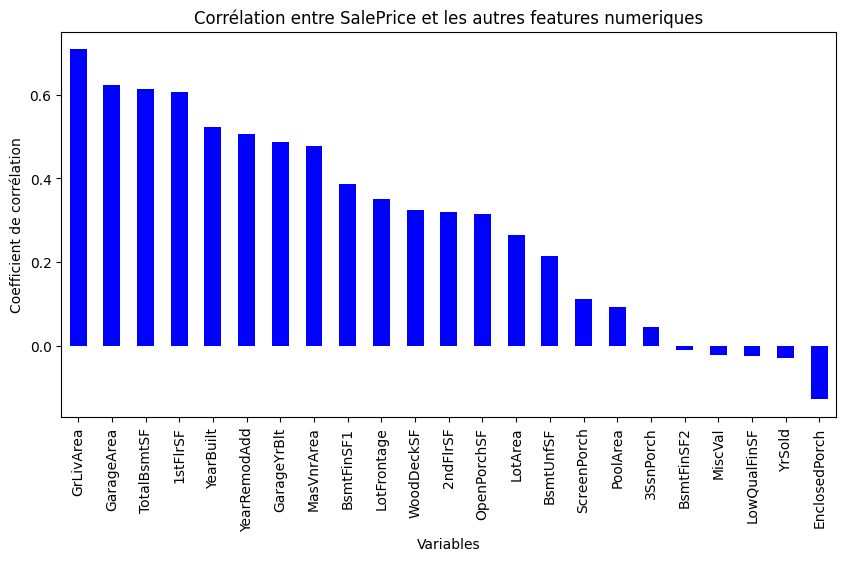

In [611]:
corr = continuous_numerical_data_df.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
corr[1:].plot(kind='bar', color='b')  # Exclut SalePrice (qui a une corrélation de 1 avec lui-même)
plt.title("Corrélation entre SalePrice et les autres features numeriques")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.show()


##### Calculating **Correlation** and **Mutuel Information**
- using correlation matrix to detect redundency in features.
- drop, or merge the features with high correlation.
- When two features have high correlation, they carry similar information. This can lead to:
- ***Redundant features*** → Makes the model more complex without adding value.
- ***Multicollinearity*** → Some models (like Linear Regression) perform poorly when features are strongly correlated.

##### What to do?
- If two features are highly correlated (above 0.8-0.9), we usually remove one.
- If they have a meaningful relationship, we can combine them into a new feature (e.g., **"TotalSF"** = **"1stFlrSF"** + **"2ndFlrSF"** + **"TotalBsmtSF"**).\
***correlation measure only linear relationships between features***

so we will calculate ***Mutuel Information*** aswell to describe the relationship between our features
- ***MI*** measures how much information one feature provides about another
- If ***MI*** is high, the feature is useful for predicting the target (SalePrice).
- If ***MI*** is low, the feature doesn’t contribute much information.

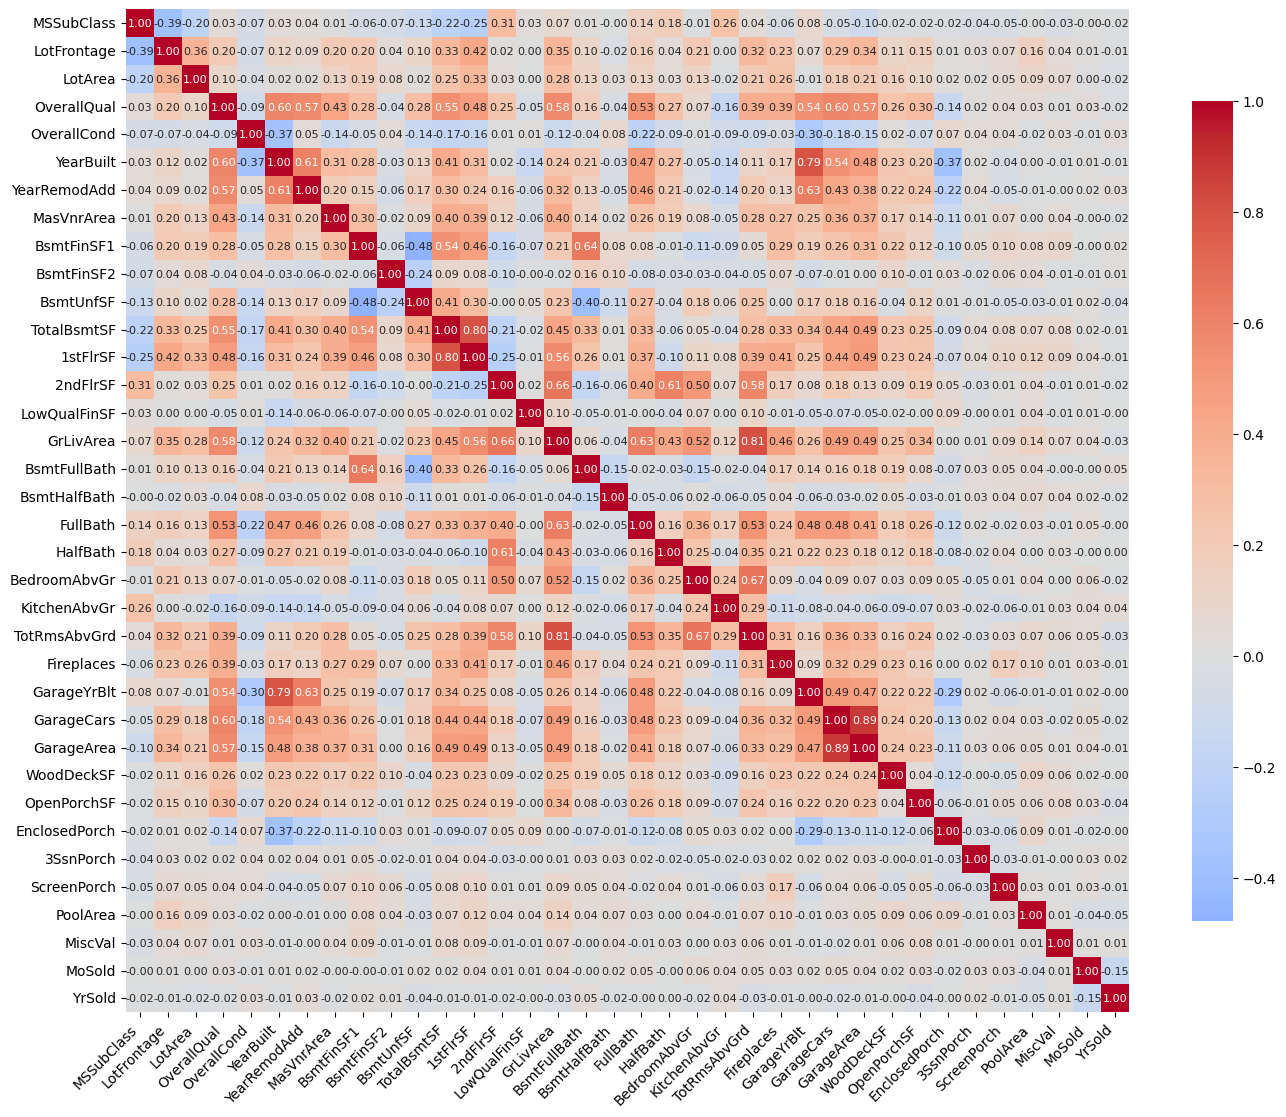

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create the correlation matrix
corr_matrix = data_numerical_df.corr()


# Create the heatmap with clearer features
plt.figure(figsize=(14, 12))  # Increase the figure size to ensure better clarity
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
            cbar_kws={'shrink': 0.75},  # Adjust color bar size
            annot_kws={"size": 8},  # Smaller annotation font size
            xticklabels=corr_matrix.columns,  # Ensure feature names are on x-axis
            yticklabels=corr_matrix.index)  # Ensure feature names are on y-axis

# Rotate the labels to make them more readable
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels and set font size
plt.yticks(rotation=0, fontsize=10)  # Set y-axis labels font size

# Adjust layout to add more space for the labels
plt.subplots_adjust(bottom=0.15, left=0.15)  # Add extra space for labels

# Display the plot
plt.tight_layout()
plt.show()


In [613]:
threshold = 0.8
high_corr_pairs = []

# Loop through the correlation matrix to find high correlations
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        # Check for high correlation and make sure not to check the diagonal (col1 != col2)
        if abs(corr_matrix.loc[col1, col2]) > threshold and col1 != col2:
            # Ensure each pair is stored only once
            if col1 < col2:  # Only add the pair if col1 is lexicographically smaller than col2
                high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

# Convert the high_corr_pairs into a DataFrame for better readability
corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Display the correlated pairs
print(corr_pairs_df)


    Feature 1     Feature 2  Correlation
0    1stFlrSF   TotalBsmtSF     0.801608
1   GrLivArea  TotRmsAbvGrd     0.808354
2  GarageArea    GarageCars     0.889700


In [614]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
y = data.SalePrice
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice", errors="ignore")

mutual_df = data[numerical_features]

# Drop rows where SalePrice is NaN
y = data["SalePrice"].dropna()
mutual_df = data[numerical_features].loc[y.index]  # Ensure mutual_df has the same index as y

mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns

# Display the sorted mutual information
pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["Mutual Information"]).style.background_gradient("coolwarm", axis=0)


,Mutual Information
OverallQual,0.574817
GrLivArea,0.484534
TotalBsmtSF,0.370944
GarageCars,0.367556
GarageArea,0.366143
YearBuilt,0.363164
1stFlrSF,0.314310
MSSubClass,0.279657
FullBath,0.262958
GarageYrBlt,0.256851


In [615]:
data_cleaned = data.dropna(subset=["SalePrice"])
y = data_cleaned["SalePrice"]

data_categorical = data_cleaned.select_dtypes(include=["object"]).columns
mutual_df_categorical = data_cleaned[data_categorical]

for colname in mutual_df_categorical.columns:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()

mutual_infoC = mutual_info_regression(mutual_df_categorical.fillna("Do_not_have_feature"), y, random_state=1)

mutual_infoC = pd.Series(mutual_infoC, index=mutual_df_categorical.columns)
mutual_info_sorted = pd.DataFrame(mutual_infoC.sort_values(ascending=False), columns=["Categorical_Feature_MI"])

mutual_info_sorted.style.background_gradient("cool")


C:\Users\User\AppData\Local\Temp\ipykernel_12640\3972905116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
C:\Users\User\AppData\Local\Temp\ipykernel_12640\3972905116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
C:\Users\User\AppData\Local\Temp\ipykernel_12640\3972905116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Categorical_Feature_MI
Neighborhood,0.501277
ExterQual,0.329996
BsmtQual,0.324826
KitchenQual,0.322202
GarageFinish,0.261661
GarageType,0.204982
FireplaceQu,0.202038
Foundation,0.197618
HeatingQC,0.169360
Exterior2nd,0.155711


Dropping Features

In [632]:
# Splitting the cleaned data
X_train = data_cleaned_scaled[:1460]  # Assuming the first 1460 rows are for training
X_test = data_cleaned_scaled[1460:2919]  # The rest for testing

# Ensure the target variables are correctly assigned
Y_train = train["SalePrice"]  # SalePrice from training data
Y_test = sample_submission["SalePrice"]  # SalePrice from the sample_submission (already extracted)

# Check for alignment in lengths
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (1460, 79)
Y_train shape: (1460,)
X_test shape: (1459, 79)
Y_test shape: (1459,)


Accuracy: -91.75%
